# Математическая статистика
## Практическое задание 3

В данном задании рассматриваются свойства условного математического ожидания. В частности, рассматривается модель смеси гауссовских распределений.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 3"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 1 балл
* Задача 3 - 2 балла
* Задача 4 - 7 баллов
* Задача 5<font size="5" color="red">\*</font> - 10 баллов

**Задача 1.** На вероятностном пространстве $\left(\mathbb{R}_+, \mathcal{B}(\mathbb{R}_+), \mathsf{P}\right)$, где $\mathsf{P}$ --- экспоненциальное распределение с параметром $\lambda$, задана случайная величина $\xi$ по правилу $\xi(\omega) = \omega$. Cигма-алгебра $\mathcal{G}$ порождена счетной системой событий $\{B_n\}_{n\geq1},$ где $B_n = \{n-1\leq \omega<n\}.$. Для $\omega \in [0, 5]$ постройте графики 
* плотности распределения $\mathsf{P}$ для $\lambda \in \{1, 3, 10\}$
* $\xi$ и $\mathsf{E}(\xi | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$
* $\xi^2$ и $\mathsf{E}(\xi^2 | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$

Используйте приведенный ниже шаблон. Одному и тому же значению $\lambda$ во всех графиках должен соответствовать один и тот же цвет.

$$\mathsf{E}(\xi | \mathcal{G}) = \sum_{n=1}^{5}\frac{E(\xi I_{\xi \in B_n})}{P(B_n)}I_{B_n},$$
где $E(\xi I_{\xi \in B_n}) = -(n + \frac{1}{\lambda})e^{-\lambda n} + (n - 1 + \frac{1}{\lambda})e^{-\lambda(n - 1)}$, а $P(B_n) = -e^{-n\lambda} + e^{-\lambda(n-1)}$

Аналогично, $$\mathsf{E}(\xi^2 | \mathcal{G}) = \sum_{n=1}^{5}\frac{E(\xi^2 I_{\xi^2 \in B_n})}{P(B_n)}I_{B_n},$$
где $E(\xi^2 I_{\xi^2 \in B_n}) = -e^{-\lambda n}(n^2 + \frac{2}{\lambda}(n + \frac{1}{\lambda})) + 
e^{-\lambda (n-1)}((n-1)^2 + \frac{2}{\lambda}(n - 1 +\frac{1}{\lambda}))$, а $P(B_n) = -e^{-n\lambda} + e^{-\lambda(n-1)}$


In [2]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
import math

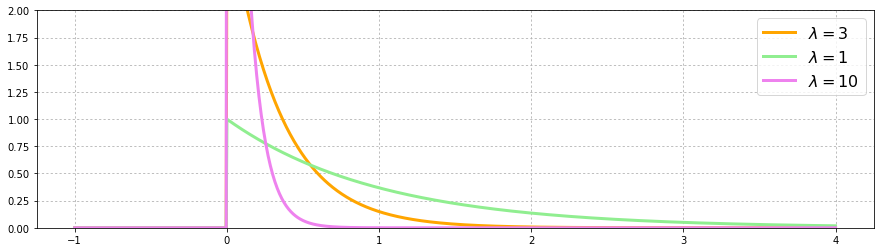

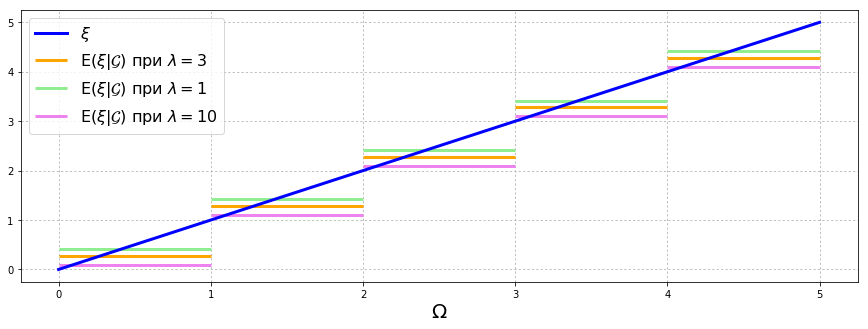

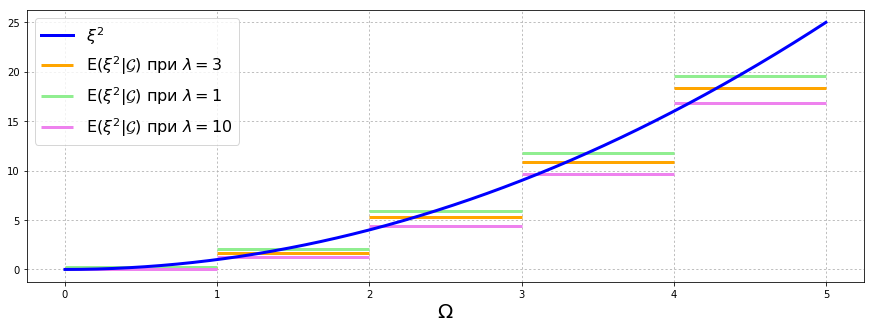

In [5]:
# График 1
grid = np.linspace(-1, 4, 1000)
plt.figure(figsize=(15, 4))
for lambd, color in {(1, 'lightgreen'), (3, 'orange'), (10, 'violet')}:
    plt.plot(grid, sps.expon.pdf(grid, scale = 1. / lambd), lw=3, 
             color=color, label='$\\lambda={}$'.format(lambd))
plt.legend(fontsize=16)
plt.ylim((0, 2))
plt.grid(ls=':')

# График 2
plt.figure(figsize=(15, 5))
grid = np.linspace(0, 5, 1000)
plt.plot(grid, grid, color='blue', lw=3, label='$\\xi$')
for lambd, color in {(1, 'lightgreen'), (3, 'orange'), (10, 'violet')}:
    for i in range(5):  # события из сигма-алгебры
        p1 = (math.exp(-lambd*(i + 1))*(-i - 1 - 1./lambd) +
             math.exp(-lambd*i)*(i + 1./lambd))
        p2 = (-math.exp(-lambd*(i + 1)) + math.exp(-lambd*i))
        plt.hlines(p1 / p2, color=color, xmin = i, xmax = i + 1, lw=3,
                   label=('$\\mathsf{E}(\\xi|\\mathcal{G})$ при $\\lambda = ' + str(lambd) 
                          + '$') if i == 1 else '')
plt.xlabel('$\\Omega$', fontsize=20)
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

# График 3 для \xi^2 аналогичен графику 2
plt.figure(figsize=(15, 5))
grid = np.linspace(0, 5, 1000)
plt.plot(grid, grid ** 2, color='blue', lw=3, label='$\\xi^2$')
for (lambd, color) in {(1, 'lightgreen'), (3, 'orange'), (10, 'violet')}:
    for i in range(5):  # события из сигма-алгебры
        p3 = -math.exp(-lambd*(i + 1)) * ((i+1)**2 + (2. * (i+1) / lambd) + (2. / (lambd ** 2))) 
        + math.exp(-lambd*i) * (i**2 + (2. * i / lambd) + (2. / (lambd ** 2)))
        p4 = (-math.exp(-lambd*(i + 1)) + math.exp(-lambd*i))
        plt.hlines(p3 / p4, color=color, xmin = i, xmax = i + 1, lw=3,
                   label=('$\\mathsf{E}(\\xi^2|\\mathcal{G})$ при $\\lambda = ' + str(lambd) 
                          + '$') if i == 1 else '')
plt.xlabel('$\\Omega$', fontsize=20)
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

**Вывод:** Из графика видно, что условное математическое ожидание усредняет значение случайной величины на каждой части разбиения сигма-алгебры. При этом лучше всего усреднение при $\lambda = 1$, как в случае $\xi(\omega)=\omega$, так и $\xi(\omega)=\omega^2$.

**Задача 2.** 
Пусть $\xi = (\xi_1, \xi_2) \sim \mathcal{N}(a, \Sigma)$, где $a=0$ и $\Sigma = \begin{pmatrix}10 & 8 \\ 8 & 10\end{pmatrix}$. Для $y \in \{-3, 0, 1, 5\}$ постройте графики условной плотности $f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right)$.

Найдем совместную плотность $(\xi_1, \xi_2)$, зная, что это вектор с невырожденной матрицей $\Sigma$:
$$f_{(\xi_1, \xi_2)}(x, y) = \frac{e^{\frac{1}{2} (x, y) ^ T\Sigma^{-1}(x, y)}}{(2\pi)^{n/2}|\Sigma|^{1/2}} = \frac{1}{12\pi} e^\frac{-(5x^2 -8xy+5y^2)}{36},$$ т.к. 
$(|\Sigma| = 100 - 64 = 36)$
При этом $$f_{\xi_2}(y) = \frac{1}{\sqrt{20\pi}}e^{\frac{-y^2}{20}}$$ Отсюда
$$f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right) = \frac{f_{(\xi_1, \xi_2)}(x, y)}{f_{\xi_2}(y)} = \frac{\sqrt{5}}{6\sqrt\pi}e^{(-\frac{5}{36}x^2 + \frac{2}{9}xy - \frac{4y^2}{45})}$$

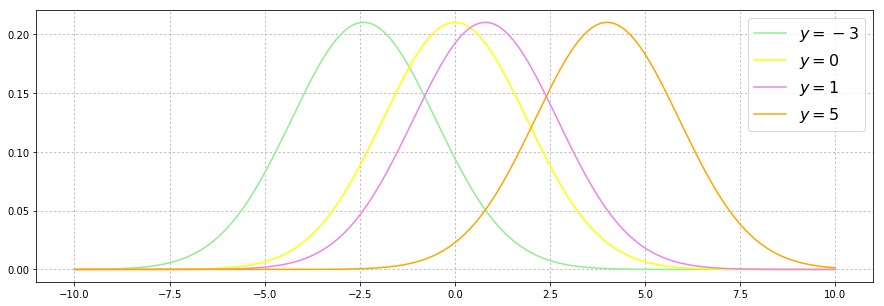

In [53]:
plt.figure(figsize=(15, 5))
grid = np.linspace(-10, 10, 1000)
for y, color in [(-3, 'lightgreen'), (0, 'yellow'), (1, 'violet'), (5, 'orange')]:
    plt.plot(grid, 1/6*np.sqrt(5/math.pi)*np.exp(-5/36*(grid**2)+2*y*grid/9-4*y*y/45),
             color=color, label='$y = ' + str(y) + '$')
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

**Вывод:** Из графиков можно предположить, что условная плотность имеет нормальное распределение, при этом $y$ - параметр сдвига, а параметр масштаба не меняется.

**Задача 3.**
Имеется множество серверов, которые периодически выходят из строя. 
Обозначим $\xi_i$ время между $i$-м моментом выхода из строя сервера и $(i+1)$-м.
Известно, что величины $\xi_i$ независимы в совокупности и имеют экспоненциальное распределение с параметром $\lambda$.

Обозначим $N_t$ --- количество серверов, которые вышли из строя к моменту времени $t$ (в начальный момент времени $N_0 = 0$).
В курсе случайных процессов будет доказано, что для любых $s < t$ величина $N_t - N_s \sim Pois(\lambda (t - s))$ и независима с $N_s$.
При этом $N_t$ как функция от $t$ будет называться пуассоновским процессом интенсивности $\lambda$.

Вам нужно знать, сколько серверов нужно докупить к моменту времени $t$ взамен вышедших из строя.
В момент времени $s$ предсказанием количества серверов, вышедших из строя к моменту времени $t$, будем считать величину $\mathsf{E}( N_t | N_s)$.

Сгенерируйте выборку случайных величин $\xi_i$ для $\lambda = 1/4$ в количестве, чтобы их сумма была больше 100.
Для $t=100$ постройте графики зависимости величины $\mathsf{E}( N_t | N_s)$ от $s$ в предополжении, что условное математическое ожидание было посчитано при значении $\lambda \in \{1/10, 1/4, 1/2, 1\}$. Нарисуйте также на графике горизонтальную прямую уровня $N_{100}$.

Распишем $\mathsf{E}( N_t | N_s)$:

$\mathsf{E}( N_t | N_s) = \mathsf{E}(N_s + (N_t - N_s) | N_s) = \mathsf{E}(N_s | N_s) + \mathsf{E}(N_t - N_s | N_s) = N_s + \mathsf{E}(N_t - N_s) = N_s + \lambda(t - s)$.

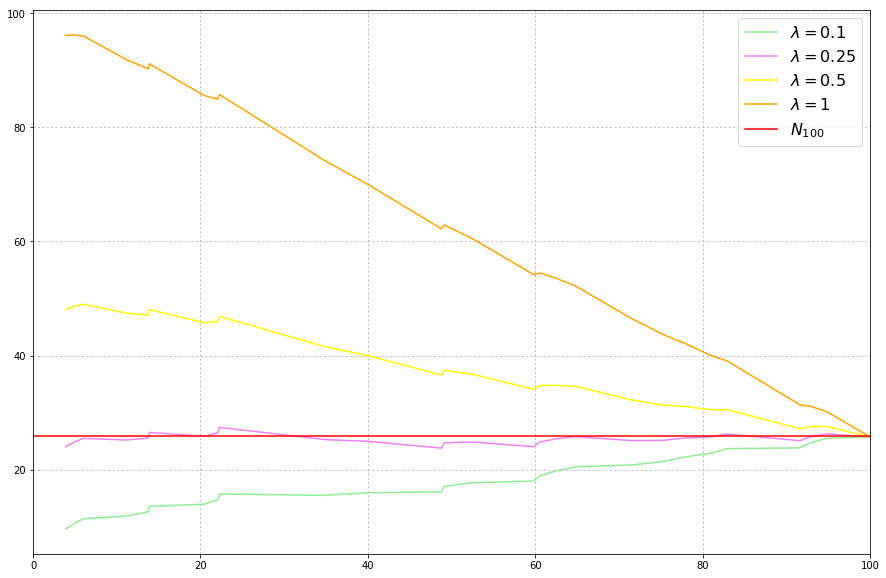

In [19]:
sample = sps.expon(scale=4).rvs(100)
while (sample.sum() < 100):
    sample.append(sps.expon(scale=4).rvs(100))

t = 100
S = sample.cumsum()
plt.figure(figsize=(15,10))
grid = np.linspace(1, 100, 100)
i = 0
while (S[i] <= 100):
    i = i + 1
i += 1
for lambd, color in [(1/10, 'lightgreen'), (1/4, 'violet'), (1/2, 'yellow'), (1, 'orange')]:
    E = np.arange(0, i, 1) + lambd * (t - S[:i])
    plt.plot(S[:i], E, color=color, label='$\\lambda = ' + str(lambd) + '$')

plt.xlim(0, 100)
plt.plot((0, 100), (i - 1, i - 1), color='red', label='$N_{100}$')
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

**Вывод:** Из графика можно видеть, что при $\lambda = \frac{1}{4}$ мы получаем наиболее точный прогноз количества вышедших из строя серверов (в том смысле, что условное матожидание близко к $N_{100}$ даже при маленьких $s$). При этом по другим графикам можно сказать, что их прогноз тем точнее, чем ближе $s$ к искомому событию (когда $s = 100$), и тем сильнее отличается от истинного значения при маленьких $s$, чем дальше параметр $\lambda$ от исходного.

**Задача 4.** 
Рассмотрим модель смеси многомерных гауссовских распределений, то есть распределение, имеющее плотность $p(x) = \sum\limits_{k=1}^K p_k(x) \mathsf{P}(T = k),$ где $T$ --- случайная величина, принимающая значения $\{1, ..., K\}$ и имеющая смысл номера компоненты смеси, а $p_k(x)$ --- плотность распределения $N(a_k, \Sigma_k)$.


Загрузите датасет "Ирисы Фишера", используя следующий код.

In [3]:
from sklearn.datasets import load_iris
data = load_iris()
data['data']  # выборка
data['target']  # номера компонент смеси

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

В предположении, что каждый класс имеет гауссовское распределение, оцените его параметры. Используйте для этого функции `numpy.mean` и `numpy.cov`. Проверьте, что матрица ковариаций получилась правильной --- возможно, придется предварительно поменять порядок осей (транспонировать). Напечатайте полученные оценки.

In [21]:
E = []
Cov = []
for i, sort in [(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]:
    E.append(data['data'][i * 50 : (i + 1) * 50].mean(axis=0))
    Cov.append(np.cov(data['data'][i * 50 : (i + 1) * 50], rowvar=False))
    print('Sort - %s' %sort)
    print('MathExpectation:')
    print(E[i])
    print('Covariation:')
    print(Cov[i])


Sort - setosa
MathExpectation:
[ 5.006  3.418  1.464  0.244]
Covariation:
[[ 0.12424898  0.10029796  0.01613878  0.01054694]
 [ 0.10029796  0.14517959  0.01168163  0.01143673]
 [ 0.01613878  0.01168163  0.03010612  0.00569796]
 [ 0.01054694  0.01143673  0.00569796  0.01149388]]
Sort - versicolor
MathExpectation:
[ 5.936  2.77   4.26   1.326]
Covariation:
[[ 0.26643265  0.08518367  0.18289796  0.05577959]
 [ 0.08518367  0.09846939  0.08265306  0.04120408]
 [ 0.18289796  0.08265306  0.22081633  0.07310204]
 [ 0.05577959  0.04120408  0.07310204  0.03910612]]
Sort - virginica
MathExpectation:
[ 6.588  2.974  5.552  2.026]
Covariation:
[[ 0.40434286  0.09376327  0.3032898   0.04909388]
 [ 0.09376327  0.10400408  0.07137959  0.04762857]
 [ 0.3032898   0.07137959  0.30458776  0.04882449]
 [ 0.04909388  0.04762857  0.04882449  0.07543265]]


Нарисуйте график плотности (тепловую карту) в проекции на первые две координаты и нанесите на график точки выборки. При выполнении задания полезно вспомнить решение части 3 задачи 1 задания 1. Используйте шаблон ниже.

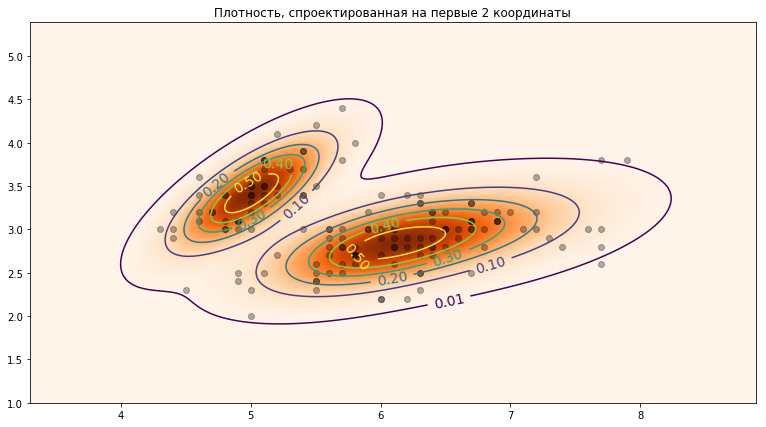

In [47]:
densities = []

grid = np.mgrid[(min(data['data'][:, 0]) - 1) : (max(data['data'][:, 0]) + 1) : 0.01, 
                (min(data['data'][:, 1]) - 1) : (max(data['data'][:, 1]) + 1) : 0.01]
for i in range(3):
    Data = data['data'][i * 50 : (i + 1) * 50]
    E = [np.mean(Data[:, 0]), np.mean(Data[:, 1])]
    Cov = np.cov(np.array([Data[:, 0], Data[:, 1]]))
    pos = np.empty(grid[0].shape + (2,))
    pos[:, :, 0] = grid[0]; pos[:, :, 1] = grid[1]
    rv = sps.multivariate_normal(E, Cov)
    densities.append(rv.pdf(pos))
    
Density = np.mean(np.array(densities), axis=0)
plt.figure(figsize=(13, 7))
plt.pcolormesh(grid[0], grid[1], Density, cmap='Oranges')
plt.scatter(data['data'][:, 0], data['data'][:, 1], alpha=0.3, color='black')
CS = plt.contour(grid[0], grid[1], Density, [0.01, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title('Плотность, спроектированная на первые 2 координаты')
plt.show()

Вычислите условное математическое ожидание $\mathsf{E}( X | I\{T \not= k\} = 1)$ для всех $k = 1,2,3$, где $X$ --- случайный вектор, имеющий распределение смеси.
Постройте графики условной плотности $p_{X|I\{T \not= k\}}\left(x \left| 1\right.\right)$ в проекции на первые две координаты. Подберите хорошие значения линий уровня.

Пусть $k = 1$. 
$$ \mathsf{E}( X | I\{T \not= 1\}) = \frac{\mathsf{E}(XI\{T = 1\})}{P(T = 1)}I\{T = 1\} + \frac{\mathsf{E}(XI\{T \not= 1\})}{P(T \not= 1)}I\{T \not= 1\} $$
$$ \frac{\mathsf{E}(XI\{T = 1\})}{P(T = 1)}I\{T = 1\} =  3(\mathsf{E}(XI\{T = 1\})(1 - I\{T \neq 1\})$$
$$\frac{\mathsf{E}(XI\{T \not= 1\})}{P(T \not= 1)}I\{T \not= 1\} = \frac{1}{2}(\mathsf{E}(XI\{T = 2\}) + \mathsf{E}(XI\{T = 3\}))I\{T \neq 1\})$$
Тогда
$$\mathsf{E}( X | I\{T \neq 1\} = 1) = \frac{3}{2}(\mathsf{E}(XI\{T = 2\}) + \mathsf{E}(XI\{T = 3\}))$$
При этом
$$p_{X|I\{T \not= 1\}}\left(x \left| y\right.\right) = p_1(x)(1 - y) + \frac{1}{2}(p_2(x) + p_3(x))y,$$ 
т.к. мат.ожидание индикатора - $\frac{1}{3}$.

Итого, 
$$p_{X|I\{T \not= 1\}}\left(x \left| 1\right.\right) = \frac{1}{2}(p_2(x) + p_3(x))$$
Аналогичные рассуждения для $ k = 2$ и $k=3$.

Условные математические ожидания:

1) $k = 1$
$$\mathsf{E}( X | I\{T \neq 1\} = 1) = \frac{3}{2}(\mathsf{E}(XI\{T = 2\}) + \mathsf{E}(XI\{T = 3\}))$$
2) $k = 2$
$$\mathsf{E}( X | I\{T \neq 1\} = 1) = \frac{3}{2}(\mathsf{E}(XI\{T = 1\}) + \mathsf{E}(XI\{T = 3\}))$$
3) $k = 3$
$$\mathsf{E}( X | I\{T \neq 1\} = 1) = \frac{3}{2}(\mathsf{E}(XI\{T = 1\}) + \mathsf{E}(XI\{T = 2\}))$$

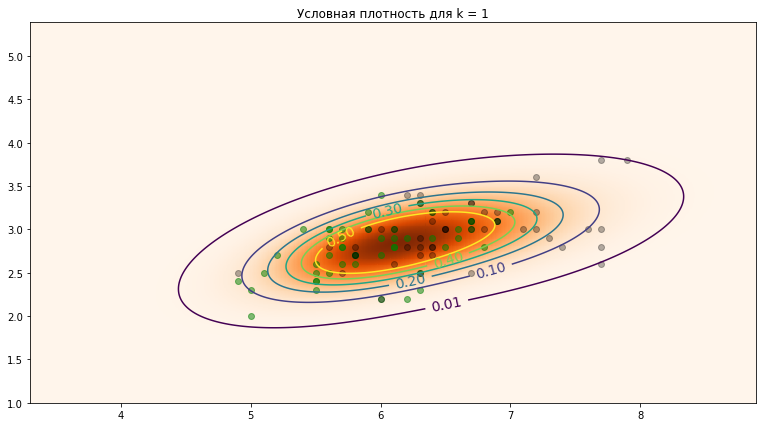

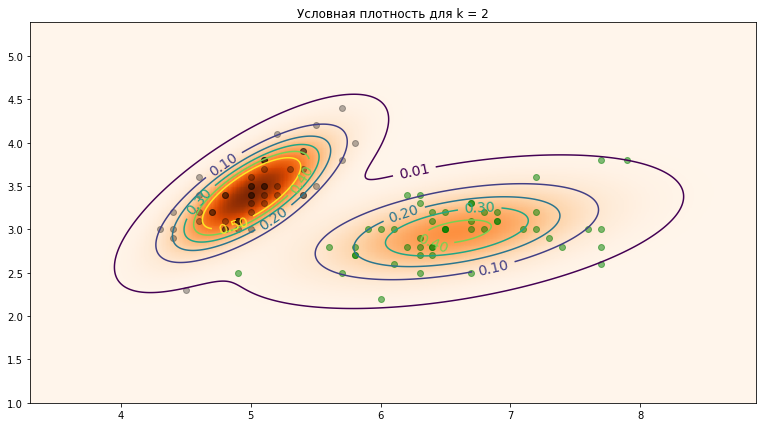

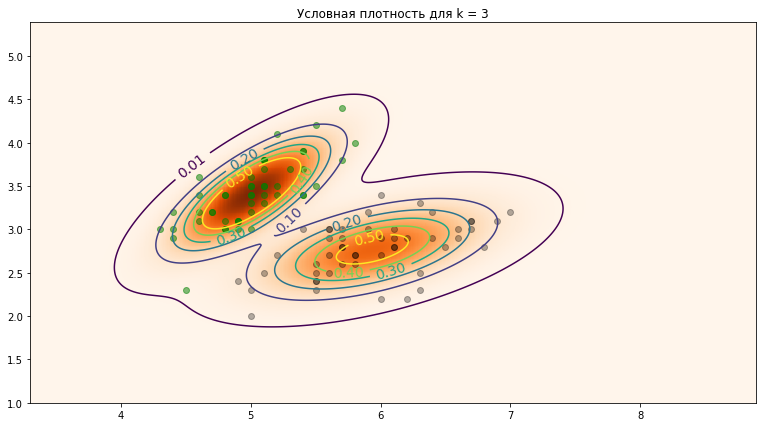

In [54]:
grid = np.mgrid[(min(data['data'][:, 0]) - 1) : (max(data['data'][:, 0]) + 1) : 0.01, 
                (min(data['data'][:, 1]) - 1) : (max(data['data'][:, 1]) + 1) : 0.01]
densities = []
all_data = []
for i in range(0, 3):
    Data = data['data'][i * 50 : (i + 1) * 50]
    all_data.append(Data)
    E = [np.mean(Data[:, 0]), np.mean(Data[:, 1])]
    Cov = np.cov(np.array([Data[:, 0], Data[:, 1]]))
    pos = np.empty(grid[0].shape + (2,))
    pos[:, :, 0] = grid[0]; pos[:, :, 1] = grid[1]
    rv = sps.multivariate_normal(E, Cov)
    densities.append(rv.pdf(pos))
Densities = [(densities[1] + densities[2]) / 2, 
             (densities[0] + densities[2]) / 2,
             (densities[1] + densities[0]) / 2]

for i in range(0, 3):
    plt.figure(figsize=(13, 7))
    plt.pcolormesh(grid[0], grid[1], Densities[i], cmap='Oranges')
    plt.scatter(all_data[(i + 1) % 3][:, 0], all_data[(i + 1) % 3][:, 1], alpha=0.5, color='green')
    plt.scatter(all_data[(i + 2) % 3][:, 0], all_data[(i + 2) % 3][:, 1], alpha=0.3, color='black')
    CS = plt.contour(grid[0], grid[1], Densities[i], [0.01, 0.1, 0.2, 0.3, 0.4, 0.5])
    plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
    plt.title('Условная плотность для k = ' + str(i + 1))
    plt.show()

Классифицируйте все пространство по принципу $k = \text{arg}\max\limits_k p_{X|I\{T = k\}}\left(x \left| 1\right.\right)$.
Посчитайте долю ошибок на выборке.
Нарисуйте классификацию всего пространства в проекции на пары координат (0, 1), (1, 3) и (2, 3), где закрасьте разными цветами области, которые образовались в результате классификации.

**Вывод:** График плотности показывает усредненную плотность по всем ирисам, без выделения какого-либо вида. Далее идут графики плотностей для каждой пары видов, при этом выборки разного цвета для разных видов ириса. Можно видеть, что ирисы 2 и 3 видов нельзя "отделить", но при этом для других пар видно, что выборки сконцентрированы в разных местах.

**Задача 5<font size="5" color="red">\*</font>.** В предыдущей задача информация о принадлежности наблюдения конкретной компоненте смеси была известна заранее. Как выть в случае, если такой информации нет? Задача оценки параметров распределения смеси может быть решена с помощью иттерационного EM-алгоритма.

Опишите, как работает EM-алгоритм (это обязательное условие, при котором эта задача будет проверяться). Затем примените EM-алгоритм к Ирисам Фишера и к некоторым искусственно сгенерированным датасетам. Исследуйте, как результат зависит от параметров алгоритма. Сделайте вывод.

*Разобраться в EM-алгоритме помогут:*

https://basegroup.ru/community/articles/em

http://www.machinelearning.ru/wiki/index.php?title=%D0%95%D0%9C-%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC

https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm

Bishop, C.M. Pattern Recognition and Machine Learning, глава 9.

*Реализация EM-алгоритма для смеси гауссовских распределений:*

http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture